In [97]:
from __future__ import print_function
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats.distributions
from msmbuilder.example_datasets import load_quadwell
from msmbuilder.example_datasets import quadwell_eigs
from msmbuilder.cluster import NDGrid
from msmbuilder.msm import MarkovStateModel
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import pandas as pd

In [30]:
grids = np.arange(20, 100, 1)
gmrq4 = np.zeros(grids.shape[0])
for row, i in enumerate(grids):
    gmrq4[row] = quadwell_eigs(i)[0][:4].sum()

In [71]:
dataset = [t for t in load_quadwell(random_state=i).trajectories for i in np.arange(10,110,10)]

In [158]:
dataset_sh = [t[:10] for t in dataset]

In [91]:
u, rv = quadwell_eigs(300)

/Users/robert_arbon/anaconda/envs/ml4dyn/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


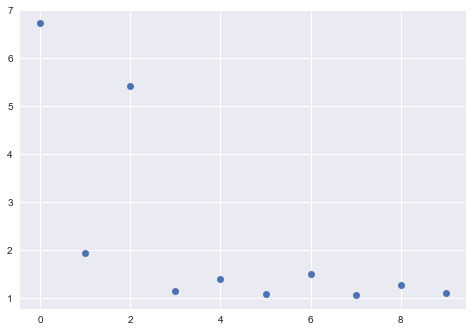

In [92]:
ts = -1/np.log(u[1:])
plt.plot(ts[:10]/ts[1:11], marker='o', ls='')
# plt.yscale('log')

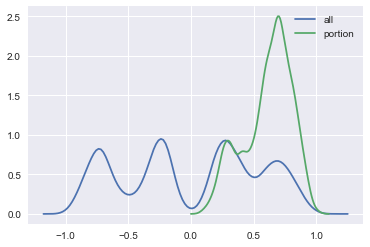

In [198]:
sns.distplot(np.concatenate(dataset), label='all', kde=True, hist=False)
sns.distplot(np.concatenate(dataset[:10]), label='portion', kde=True, hist=False)
plt.legend()

In [160]:
pipeline = Pipeline([
    ('grid', NDGrid(min=-1.2, max=1.2)),
    ('msm', MarkovStateModel(n_timescales=3, reversible_type='transpose', verbose=False)),
])


In [ ]:
search = GridSearchCV(pipeline, cv=2, refit=False, 
                      param_grid={'grid__n_bins_per_feature': list(np.arange(2,50,1))})
search.fit(dataset[:15])

In [204]:
df = pd.DataFrame(search.cv_results_)

In [205]:
df.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_grid__n_bins_per_feature,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.007882,0.011395,1.000000,1.000000,2,{'grid__n_bins_per_feature': 2},48,1.000000,1.000000,1.000000,1.000000,0.000363,0.001470,0.0,0.0
1,0.009143,0.004559,1.886981,1.886981,3,{'grid__n_bins_per_feature': 3},46,1.886981,1.886981,1.886981,1.886981,0.003157,0.000159,0.0,0.0
2,0.004323,0.004373,1.847980,1.847980,4,{'grid__n_bins_per_feature': 4},47,1.847980,1.847980,1.847980,1.847980,0.000210,0.000170,0.0,0.0
3,0.005351,0.004512,2.504572,2.504572,5,{'grid__n_bins_per_feature': 5},45,2.504572,2.504572,2.504572,2.504572,0.000471,0.000006,0.0,0.0
4,0.005283,0.005517,2.627931,2.627931,6,{'grid__n_bins_per_feature': 6},44,2.627931,2.627931,2.627931,2.627931,0.000842,0.000318,0.0,0.0


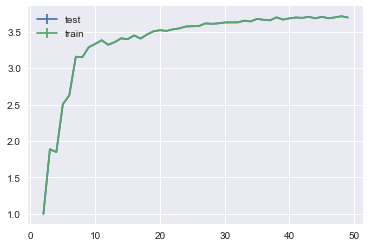

In [206]:
plt.errorbar(df['param_grid__n_bins_per_feature'], df['mean_test_score'],yerr=df['std_test_score'], label='test')
plt.errorbar(df['param_grid__n_bins_per_feature'], df['mean_train_score'],yerr=df['std_train_score'], label='train')
plt.legend()

In [138]:
df.sort_values(by='mean_test_score', inplace=True, ascending=False)

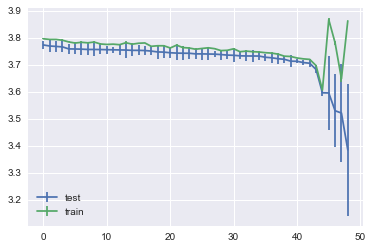

In [139]:
plt.errorbar(np.arange(len(df)), df['mean_test_score'],yerr=df['std_test_score'], label='test')
plt.errorbar(np.arange(len(df)), df['mean_train_score'],yerr=df['std_train_score'], label='train')
plt.legend()